# Importing required libraries and helper functions

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
from convolution import conv2
from generate_log import generate_log
from nms2d import nms2d
from nms3d import nms3d

# Please enter the number of sigma values/scales to generate LoG kernels

In [2]:
scales = input("number of scales: ")

number of scales: 5


In [3]:
sigmalist = [0]*int(scales)
for i in range(int(scales)):
    value = ((1.6)*((np.sqrt(2))**i))
    sigmalist[i] = round(value,2)

# SigmaList

In [4]:
sigmalist

[1.6, 2.26, 3.2, 4.53, 6.4]

# scale-normalized Laplacian Kernel
(sigma)x(sigma)x(kernel)

(18, 18)


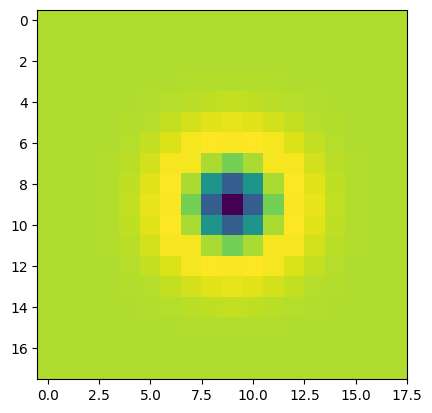

(34, 34)


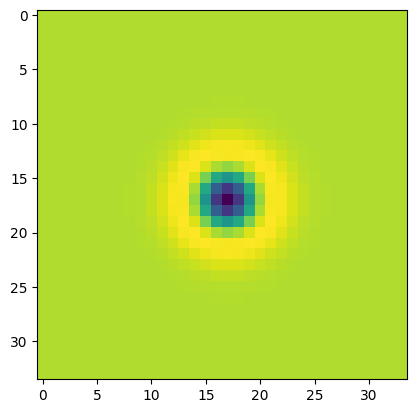

(68, 68)


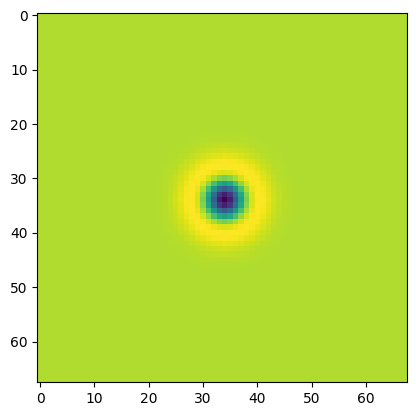

(132, 132)


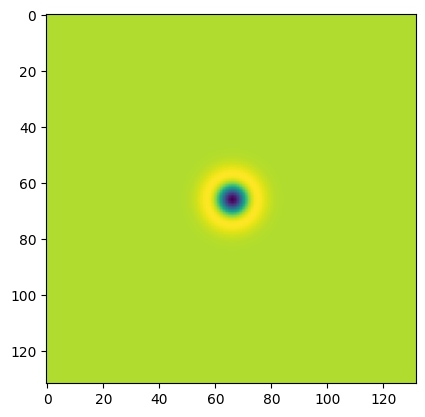

(250, 250)


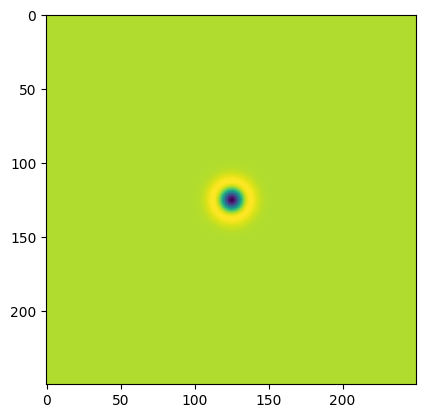

In [5]:
masklist = []
for sigma in sigmalist:
    kernel = generate_log(sigma)
    mask = (sigma*sigma)*(kernel)
    
    print(mask.shape)
    plt.imshow(mask)
    plt.show()
    masklist.append(mask)

# Test image

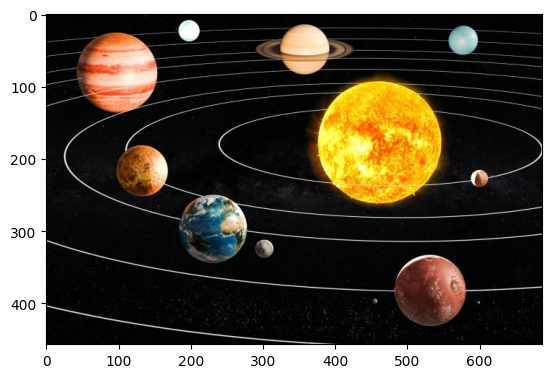

In [6]:
image = cv2.imread("TestImages4Project//solarsystem.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

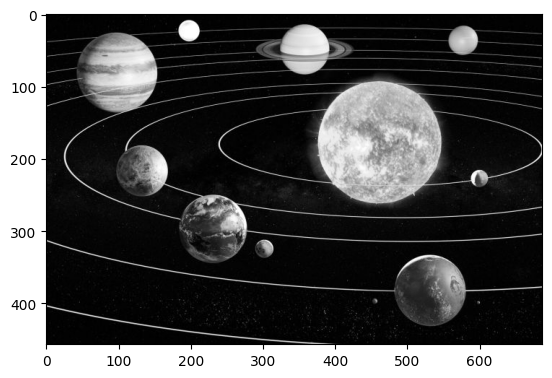

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_image = gray_image/gray_image.max()
plt.imshow(gray_image, cmap = 'gray')
plt.show()

# Convolving the gray test image with above generated LoG masks

In [8]:
threshold = 0.008

In [9]:
laplacian_scale_space = []

for mask in masklist:
    
    edge_image = conv2(gray_image, mask, pad = 0)
    value = edge_image*edge_image

    laplacian_scale_space.append(value)

# Displaying Laplacian scale space

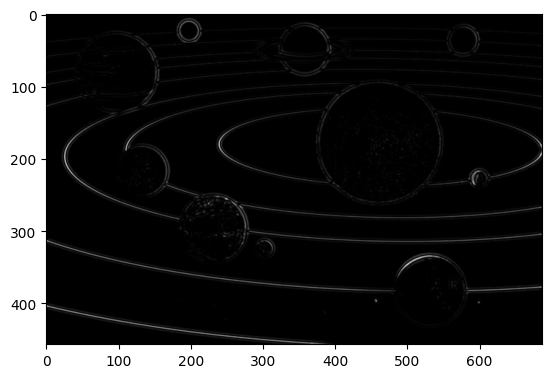

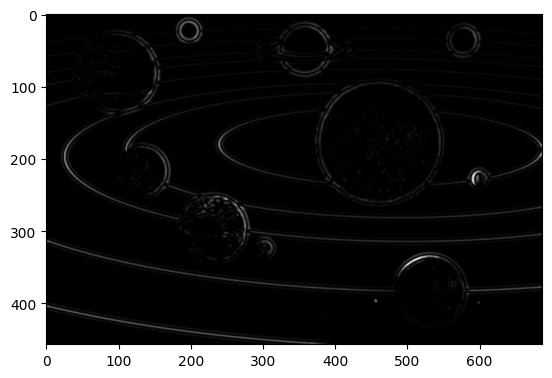

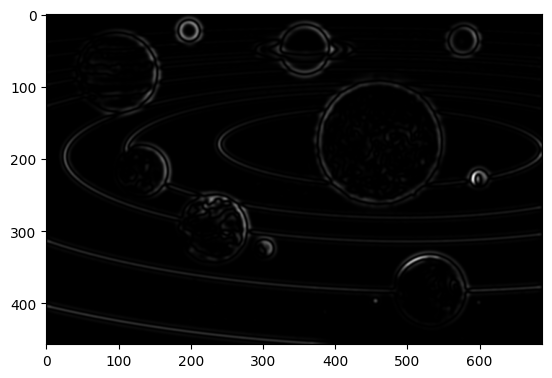

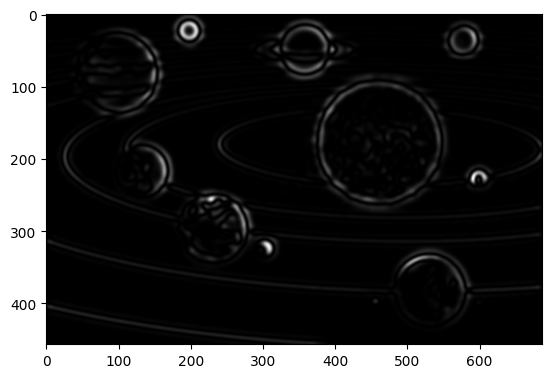

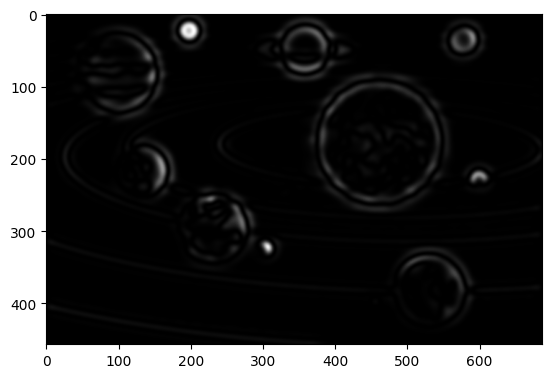

In [10]:
for image in laplacian_scale_space:
    
    plt.imshow(image, cmap = 'gray')
    plt.show()

# Find maxima of squared Laplacian response in scale-space

# 2-D NMS(Non-Max Suppression)

In [11]:
binary_laplacian_scale_space = np.copy(laplacian_scale_space)
for i in range(len(laplacian_scale_space)):
    
    nms_slice = nms2d(laplacian_scale_space[i], threshold)
    binary_laplacian_scale_space[i] = nms_slice

# 3-D NMS

In [12]:
modified_binary_laplacian_scale_space = nms3d(binary_laplacian_scale_space, laplacian_scale_space)

# Drawing circles at the detected maxima

In [13]:
thickness = 1
color = (0, 0, 255)

In [14]:
image_copy = cv2.imread("TestImages4Project//solarsystem.jpg")

In [15]:
for i in range(len(modified_binary_laplacian_scale_space)):
    
    y = np.nonzero(modified_binary_laplacian_scale_space[i])
    
    for j in range(y[0].shape[0]):
        
        row_location = y[0][j]
        col_location = y[1][j]
        
        center_coordinates = (col_location, row_location)
        radius_val = sigmalist[i]*(np.sqrt(2))
        radius = math.ceil(radius_val)
        
        image_copy = cv2.circle(image_copy, center_coordinates, radius, color, thickness)

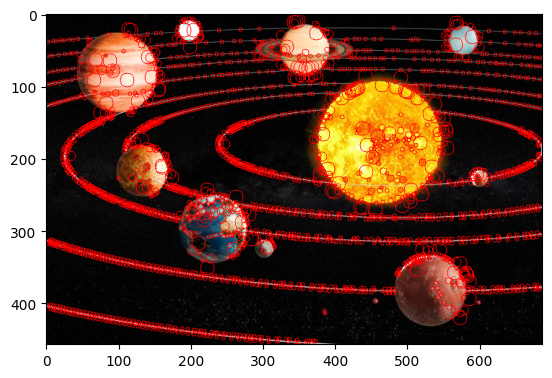

In [16]:
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)
plt.show()

In [17]:
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
cv2.imwrite('solarsystem_blob.png',image_copy)

True